# Nonlinear modeling (usind Echo-State Network)

In [1]:
import os
import numpy as np
import pickle

### SELECT DATA
#from config import MRI5_NVF1_10mm_1p2mmV_1 as cfg
#from config import MRI5_NVF1_10mm_0p4mmV_1 as cfg
#from config import MRI8_NVF4_10mm_0p0mmVVV as cfg
#from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

#from config import MRI6_NVF2_10mm_2mmV_1 as cfg
#from config import MRI6_NVF2_10mm_1p8mmV_1 as cfg

#from config import MRI6_NVF2_10mm_1p2mmV_1 as cfg
#from config import MRI6_NVF2_10mm_0p4mmV_1 as cfg

os.chdir('../')
from lib.methods import *

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

In [2]:
class MRI8_NVF4_10mm_0p2mmVVV:
    FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p2mmVVV'
    ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [160000, 180000]
    FILTER_METHOD = 'bandpass_filtering'
    BANDPASS_PARAMS = {
                    'passband_edge_freq':[100, 350], 
                    'stopband_edge_freq':[20, 800], 
                    'passband_edge_max_loss':1, 
                    'stopband_edge_min_loss':40
                    }


class MRI8_NVF4_10mm_0p0mmVVV:
    FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p0mmVVV'
    ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [160000, 180000]
    FILTER_METHOD = 'bandpass_filtering'
    BANDPASS_PARAMS = {
                    'passband_edge_freq':[100, 350], 
                    'stopband_edge_freq':[20, 800], 
                    'passband_edge_max_loss':1, 
                    'stopband_edge_min_loss':40
                    }

class MRI8_NVF4_10mm_0p0mmVVVV:
    FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p0mmVVVV'
    ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [161000, 180000]
    FILTER_METHOD = 'bandpass_filtering'
    BANDPASS_PARAMS = {
                    'passband_edge_freq':[100, 450], 
                    'stopband_edge_freq':[50, 800], 
                    'passband_edge_max_loss':1, 
                    'stopband_edge_min_loss':20
                    }

In [3]:
cfg = MRI8_NVF4_10mm_0p2mmVVV

In [28]:
cfg = MRI8_NVF4_10mm_0p0mmVVV

In [32]:
cfg = MRI8_NVF4_10mm_0p0mmVVVV

In [4]:
os.chdir('../')

## Load data

In [33]:
[mic_t_data, mic_data] = LoadCSV(
                                file_path=cfg.FILE_DIR+cfg.DATA_NAME+cfg.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic


## Preprocess

In [34]:
preprocess = PreProcessing(data=mic_data, t_data=mic_t_data)
preprocess.filter(method=cfg.FILTER_METHOD, params=cfg.BANDPASS_PARAMS)
preprocess.cut(sample_span=cfg.SAMPLE_SPAN, new_t=True)
mic_data = preprocess.data
mic_t_data = preprocess.t_data

## Figure

In [7]:
class Figure():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]   

    def plt_timeseries_and_attractor(self, 
                                    data, t_data, n_sample1=None, n_sample2=None, n_shift=10, 
                                    figsize=(23, 5), width_ratios=[3, 1], wspace=0.25,
                                    title=None, 
                                    xlabel1='Time [ms]', ylabel1=r'$x(t)$', linestyle1='-', c1='k', lw1='3',
                                    xlabel2=r'$x(t)$', ylabel2=r'$x(t-\tau)$', linestyle2='-', c2='k', lw2='3',
                                    panel_list = ['(a)', '(b)'], panel_xy_list=[(0.58, 0.93), (0.24, 0.93)], panel_fontsize=40, 
                                    save_filename=None):
        fig = plt.figure(figsize=figsize)
        spec = gridspec.GridSpec(ncols=2, nrows=1,
                            width_ratios=width_ratios,
                            wspace=wspace
                            )
        
        ax0 = fig.add_subplot(spec[0])
        ax0.set_title(title, loc='left')
        ax0.plot(t_data[:n_sample1], data[:n_sample1], linestyle=linestyle1, c=c1, lw=lw1)
        ax0.set_xlabel(xlabel1)
        ax0.set_ylabel(ylabel1)
        fig.text(ax0.get_position().x1-panel_xy_list[0][0], ax0.get_position().y1-panel_xy_list[0][1], s=panel_list[0], fontsize=panel_fontsize)

        ax1 = fig.add_subplot(spec[1])
        ax1.plot(data[n_shift:][:n_sample2], data[:-n_shift][:n_sample2], linestyle=linestyle2, c=c2, lw=lw2)
        ax1.set_xlabel(xlabel2)
        ax1.set_ylabel(ylabel2)
        ax1.set_aspect('equal', 'datalim')
        fig.text(ax1.get_position().x1-panel_xy_list[1][0], ax1.get_position().y1-panel_xy_list[1][1], s=panel_list[1], fontsize=panel_fontsize)

        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename)

In [8]:
fig = Figure({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

C:\Users\rm0179rx\AppData\Local\Temp\ipykernel_5488\3343151965.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


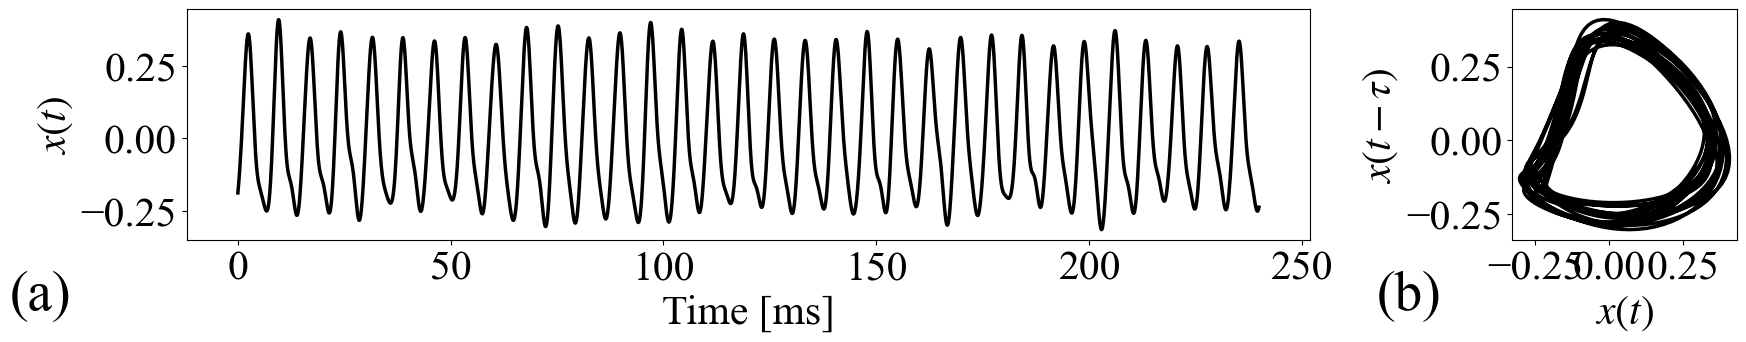

In [27]:
n_start=0

fig.plt_timeseries_and_attractor(data=mic_data[n_start:], t_data=mic_t_data[n_start:]*1000, n_sample1=3000, n_sample2=1500, n_shift=20, 
                                 figsize=(20, 3), width_ratios=[5, 1], wspace=0.3,
                                 title=None, 
                                 xlabel1='Time [ms]', ylabel1=r'$x(t)$', linestyle1='-', c1='k', lw1='2.5',
                                 xlabel2=r'$x(t)$', ylabel2=r'$x(t-\tau)$', linestyle2='-', c2='k', lw2='2.5',
                                 panel_list = ['(a)', '(b)'], panel_xy_list=[(0.65, 1.0), (0.18, 1.0)], panel_fontsize=40, 
                                 save_filename=None)

C:\Users\rm0179rx\AppData\Local\Temp\ipykernel_5488\3343151965.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


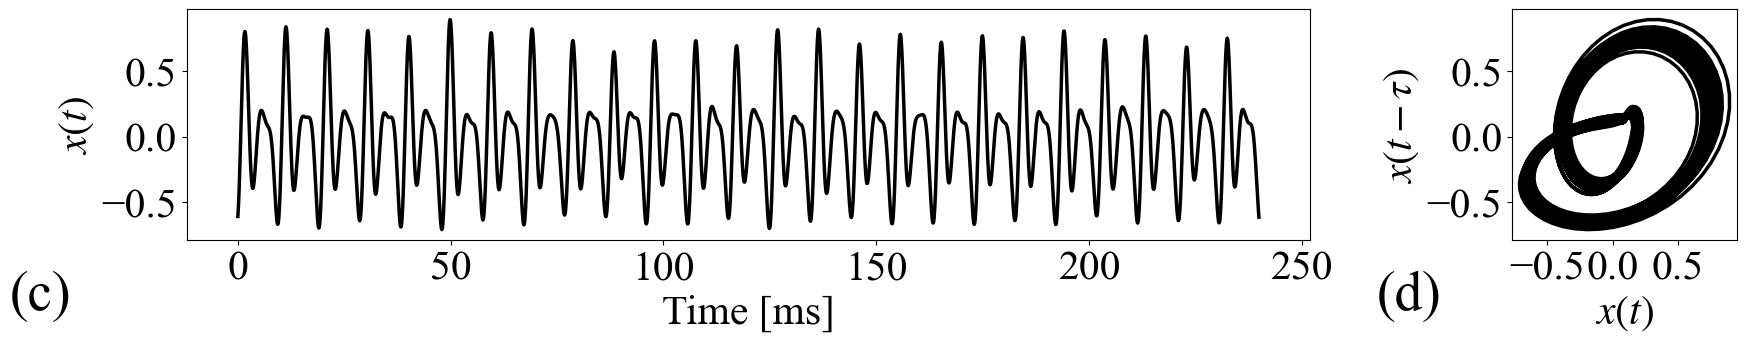

In [31]:
fig.plt_timeseries_and_attractor(data=mic_data, t_data=mic_t_data*1000, n_sample1=3000, n_sample2=3000, n_shift=10, 
                                 figsize=(20, 3), width_ratios=[5, 1], wspace=0.3,
                                 title=None, 
                                 xlabel1='Time [ms]', ylabel1=r'$x(t)$', linestyle1='-', c1='k', lw1='2.5',
                                 xlabel2=r'$x(t)$', ylabel2=r'$x(t-\tau)$', linestyle2='-', c2='k', lw2='2.5',
                                 panel_list = ['(c)', '(d)'], panel_xy_list=[(0.65, 1.0), (0.18, 1.0)], panel_fontsize=40, 
                                 save_filename=None)

C:\Users\rm0179rx\AppData\Local\Temp\ipykernel_5488\3343151965.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


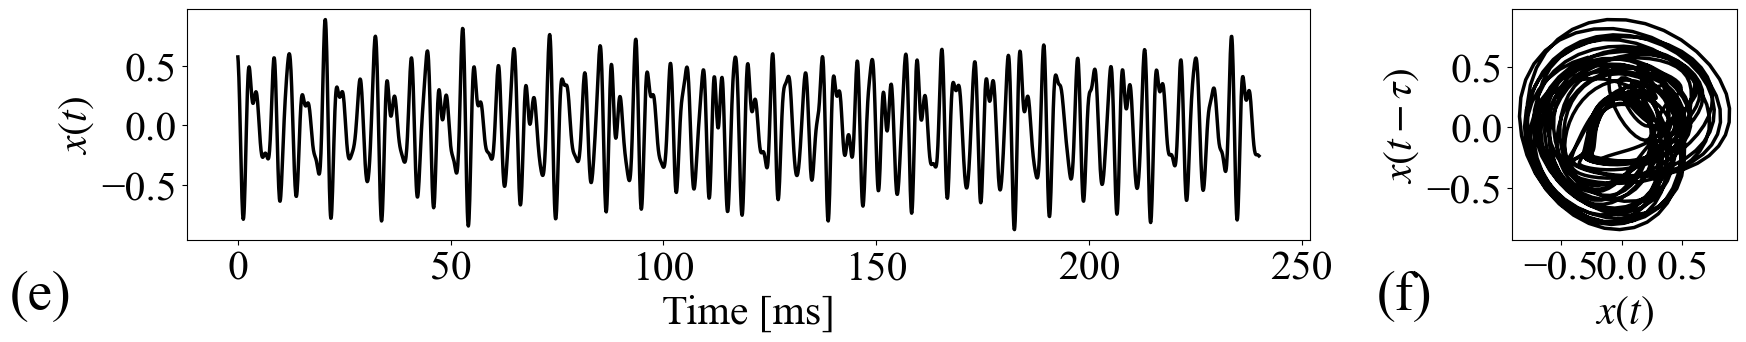

In [37]:
fig.plt_timeseries_and_attractor(data=mic_data, t_data=mic_t_data*1000, n_sample1=3000, n_sample2=1500, n_shift=9, 
                                 figsize=(20, 3), width_ratios=[5, 1], wspace=0.3,
                                 title=None, 
                                 xlabel1='Time [ms]', ylabel1=r'$x(t)$', linestyle1='-', c1='k', lw1='2.5',
                                 xlabel2=r'$x(t)$', ylabel2=r'$x(t-\tau)$', linestyle2='-', c2='k', lw2='2.5',
                                 panel_list = ['(e)', '(f)'], panel_xy_list=[(0.65, 1.0), (0.18, 1.0)], panel_fontsize=40, 
                                 save_filename=None)

C:\Users\rm0179rx\AppData\Local\Temp\ipykernel_15396\319451303.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


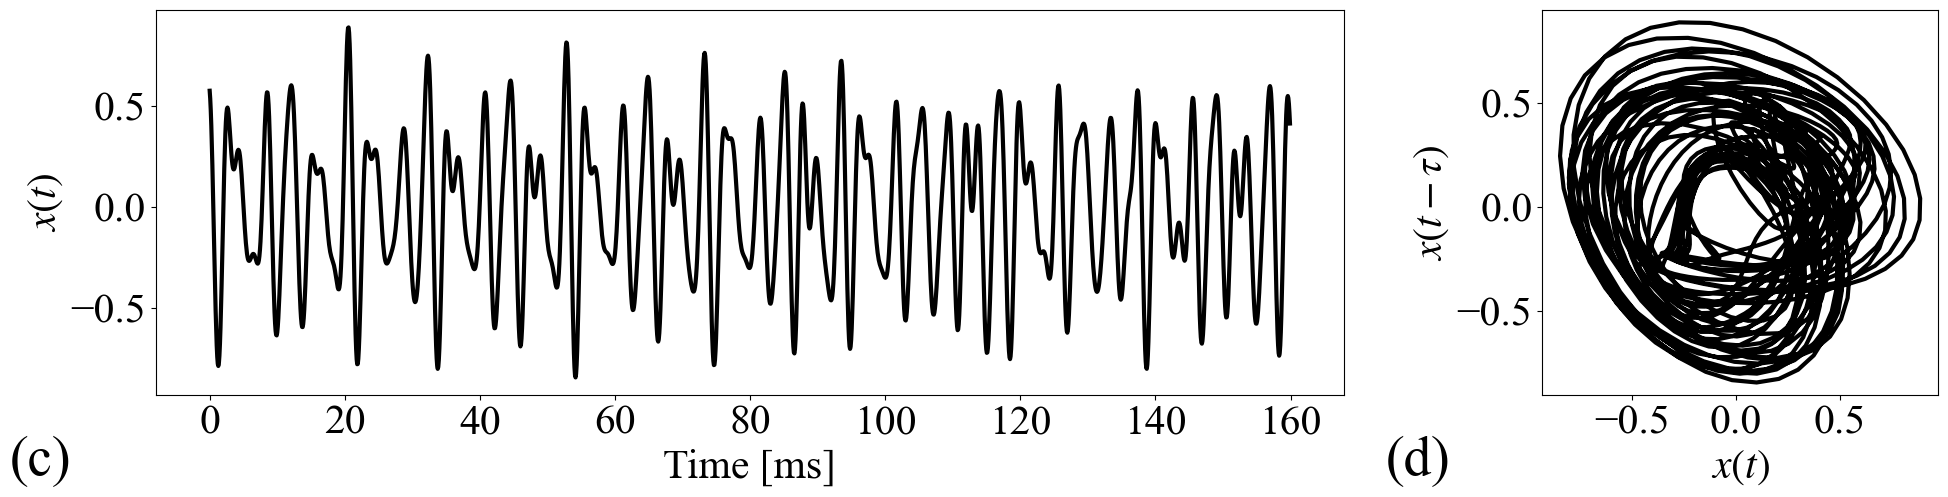

In [ ]:
fig.plt_timeseries_and_attractor(data=mic_data, t_data=mic_t_data*1000, n_sample1=2000, n_sample2=2000, n_shift=10, 
                                 figsize=(23, 5), width_ratios=[3, 1], wspace=0.25,
                                 title=None, 
                                 xlabel1='Time [ms]', ylabel1=r'$x(t)$', linestyle1='-', c1='k', lw1='3',
                                 xlabel2=r'$x(t)$', ylabel2=r'$x(t-\tau)$', linestyle2='-', c2='k', lw2='3',
                                 panel_list = ['(c)', '(d)'], panel_xy_list=[(0.58, 0.93), (0.24, 0.93)], panel_fontsize=40, 
                                 save_filename=None)